In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io
from scipy.signal import lfilter,butter,filtfilt
import itertools
from scipy.stats import pearsonr
from scipy.signal import welch
#import seaborn as sns

In [6]:
nic=scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_19_FP_mean_denoisedTS.mat')
data = nic['mts'].T
print(data.shape)

(29, 3890)


In [7]:
roinames = nic["roi_names"].flatten()
for name in roinames:
    print(name[0])

ACC
L_Acb
L_Amygdala
L_Amygdala_CM_Juelich50
L_Amygdala_LB_Juelich50_minus_intersect
L_Amygdala_SF_Juelich50
L_Caudate
L_FOrb
L_Hipp
L_Insula
L_MidFG
L_Pallidum
L_Putamen
L_SN_Hammersn30r83_74
L_Thalamus
R_Acb
R_Amygdala
R_Amygdala_CM_Juelich50
R_Amygdala_LB_Juelich50_minus_intersect
R_Amygdala_SF_Juelich50
R_Caudate
R_FOrb
R_Hipp
R_Insula
R_MidFG
R_Pallidum
R_Putamen
R_SN_Hammersn30r83_75
R_Thalamus


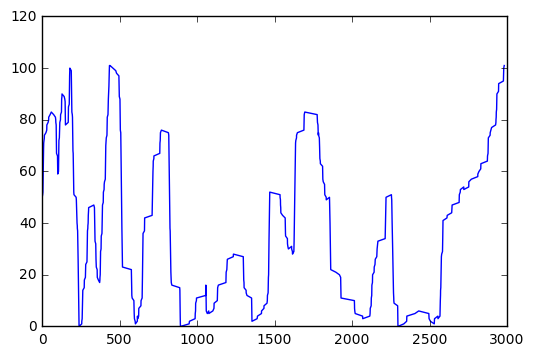

In [8]:
nict = scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_19-FP/07-Jun-2017_10-43_LMP_NIC_19_FP.mat')
craving = nict['craveUpdate']
crav_t=(craving[0][0][0].T).flatten()
crav_v=(craving[0][0][1].T).flatten()
plt.plot(crav_t,crav_v)

In [9]:
# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_bandpass(lowcut,highcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    b,a = butter(order, [low, high], btype='band')
    return b,a

def butter_bandpass_filter(data,lowcut,highcut,fs,order=5):
    b,a = butter_bandpass(lowcut,highcut,fs,order=order)
    return filtfilt(b,a,data)

# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_lowpass(lowcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq

    b,a = butter(order, low, btype='low')
    return b,a

def butter_lowpass_filter(data,lowcut,fs,order=5):
    b,a = butter_lowpass(lowcut,fs,order=order)
    return filtfilt(b,a,data)

sampling_freq = 1/0.802
print(sampling_freq)

1.2468827930174562


[ 316  556  796 1036 1276 1516 1756 1996 2236 2476]


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


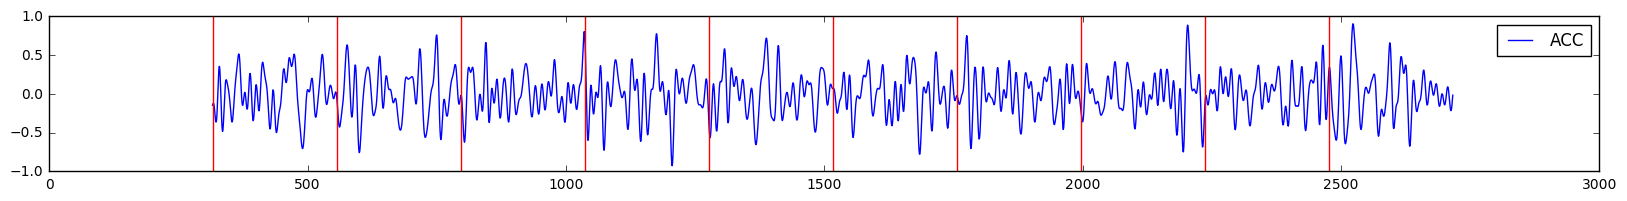

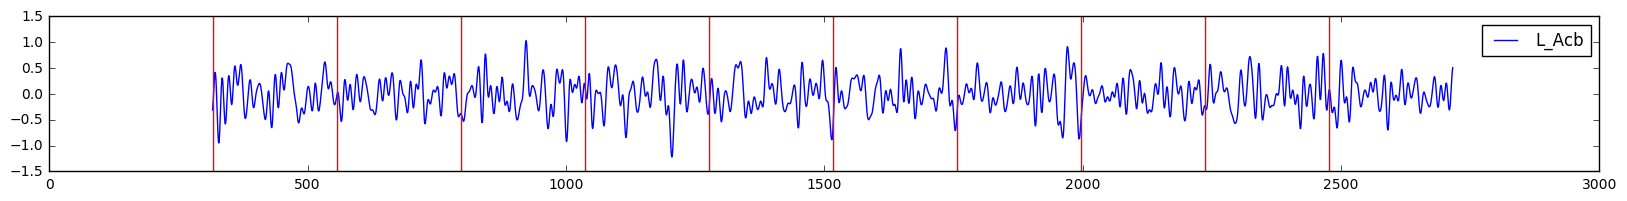

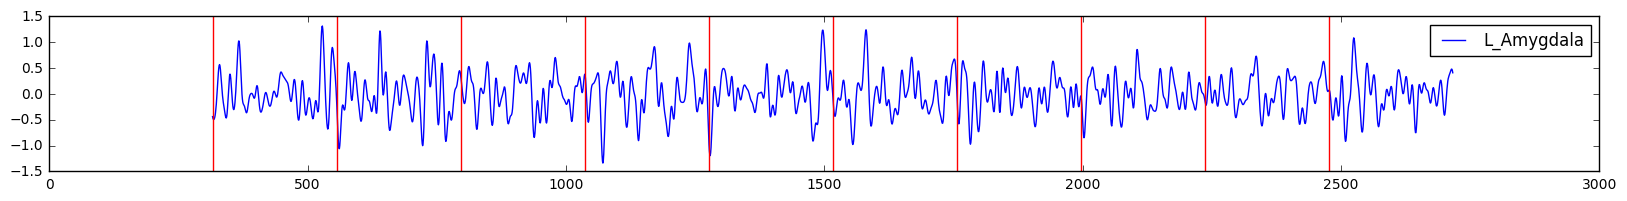

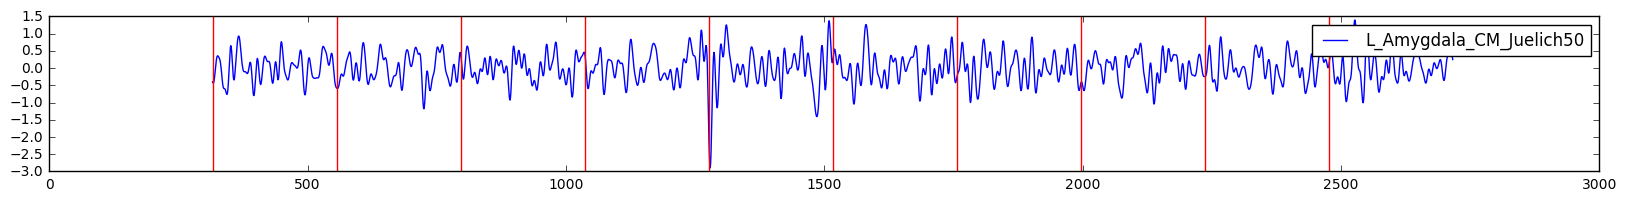

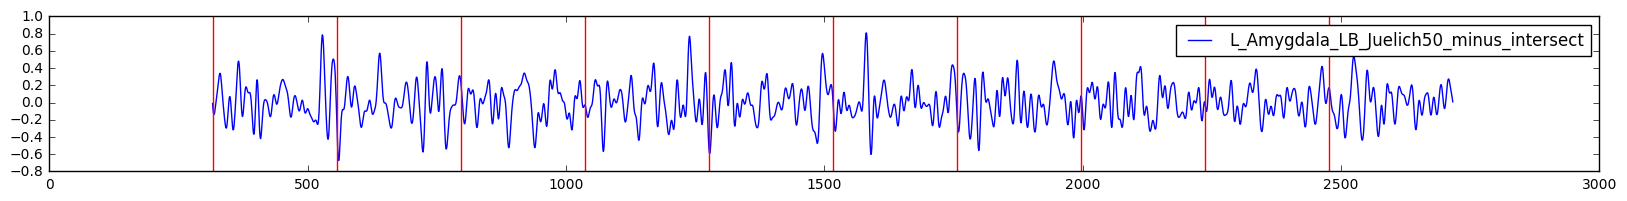

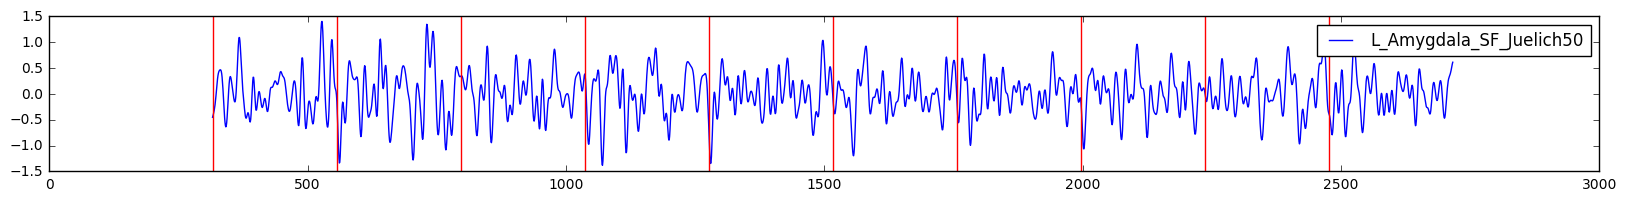

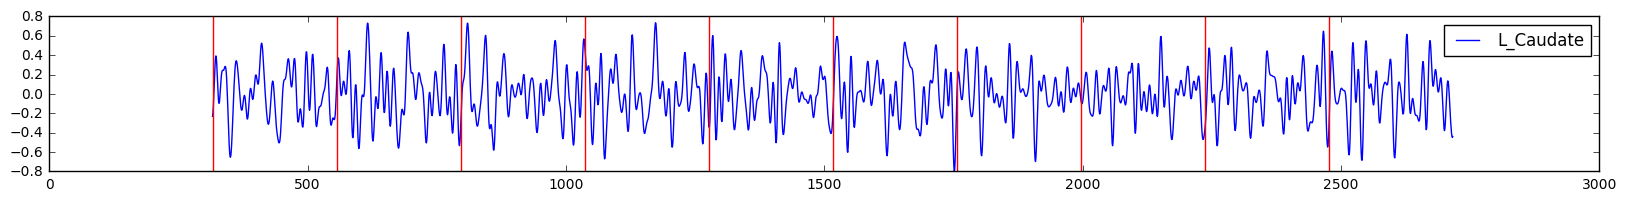

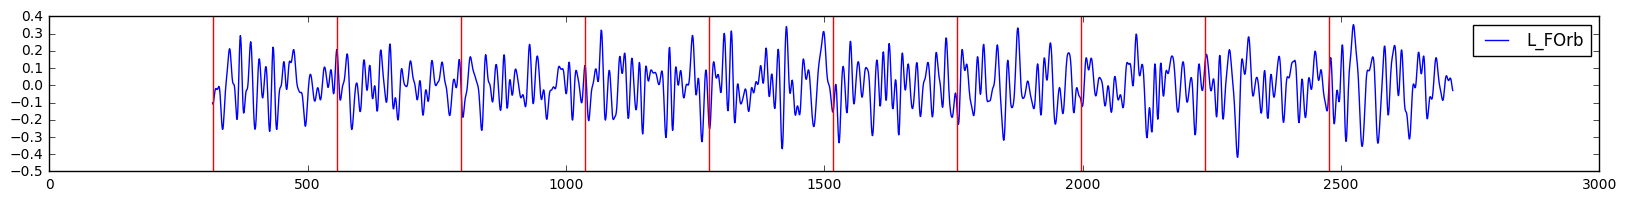

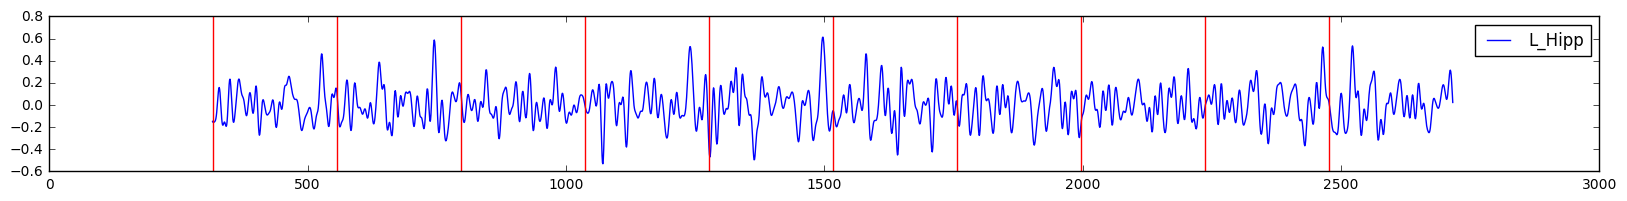

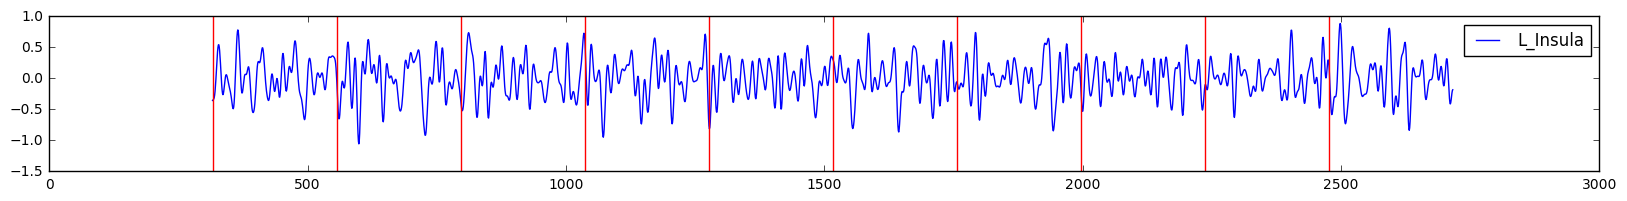

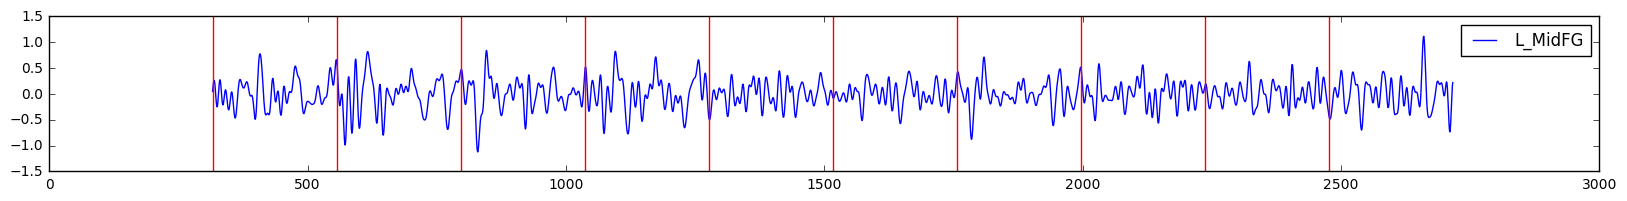

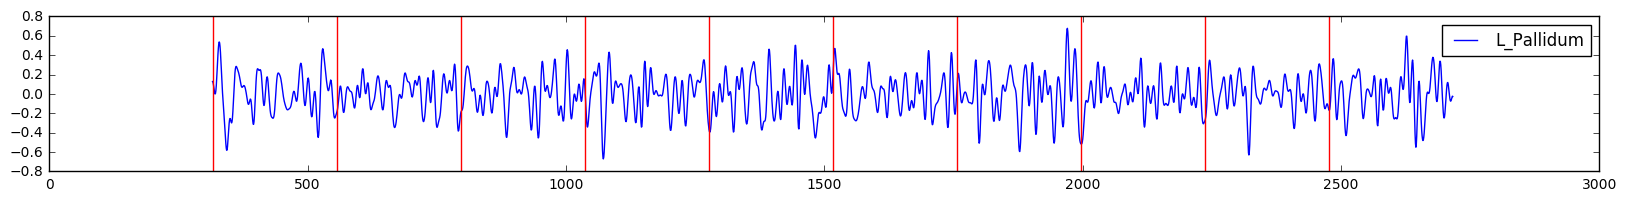

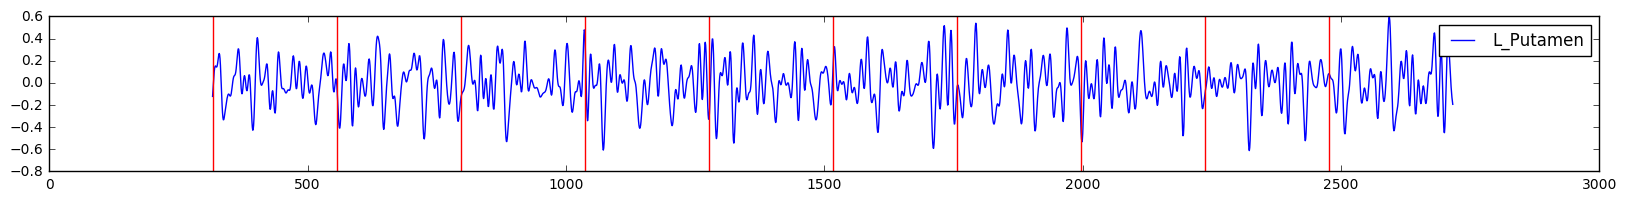

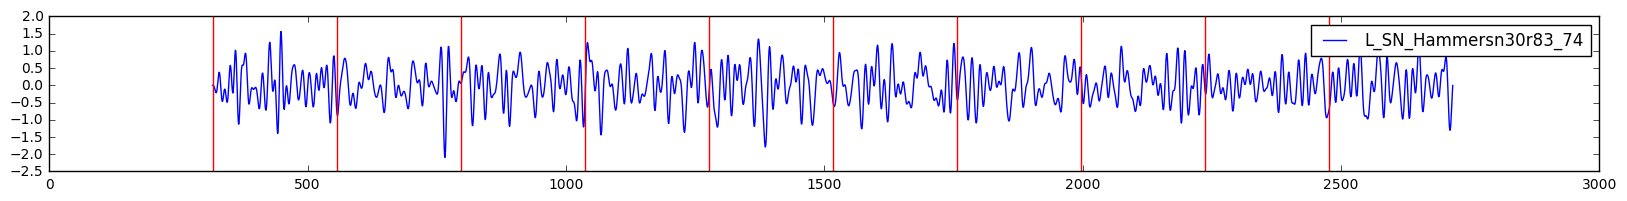

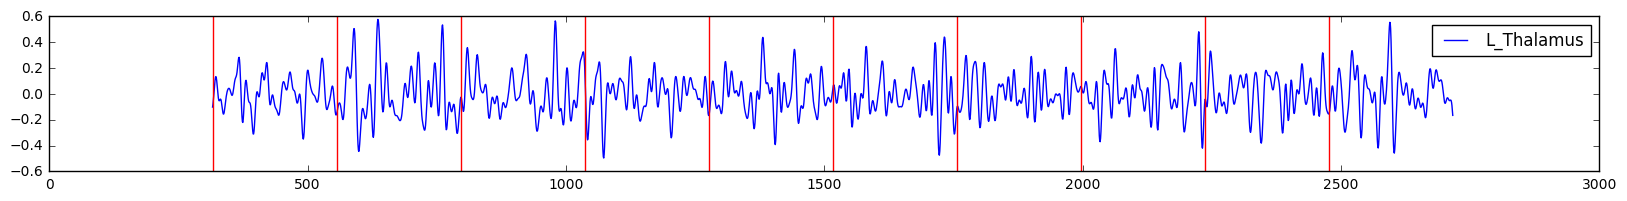

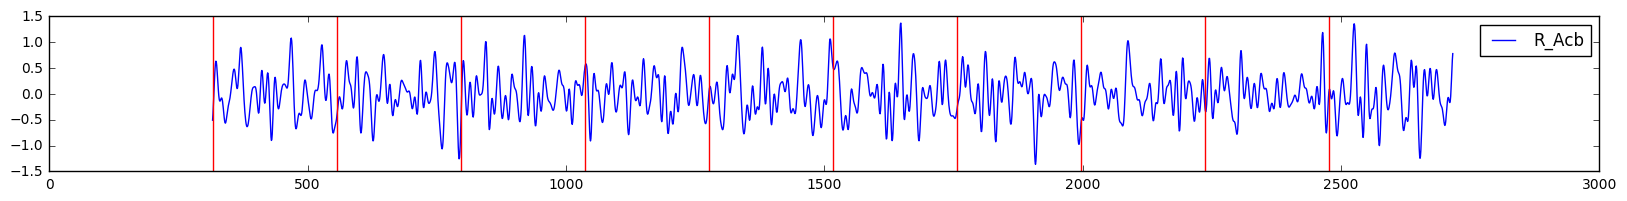

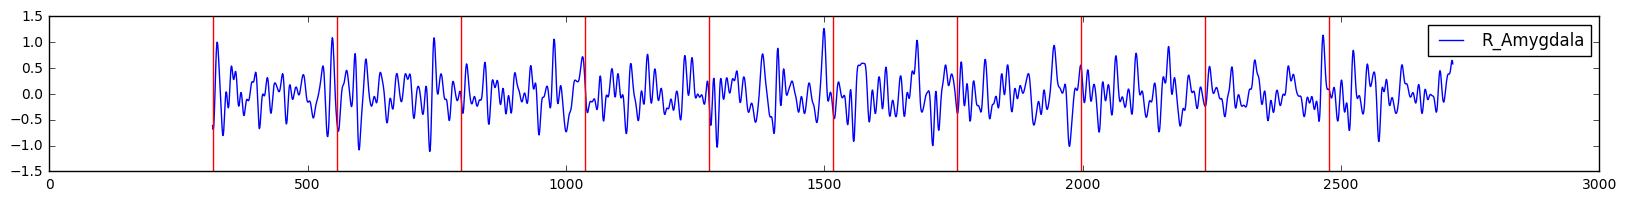

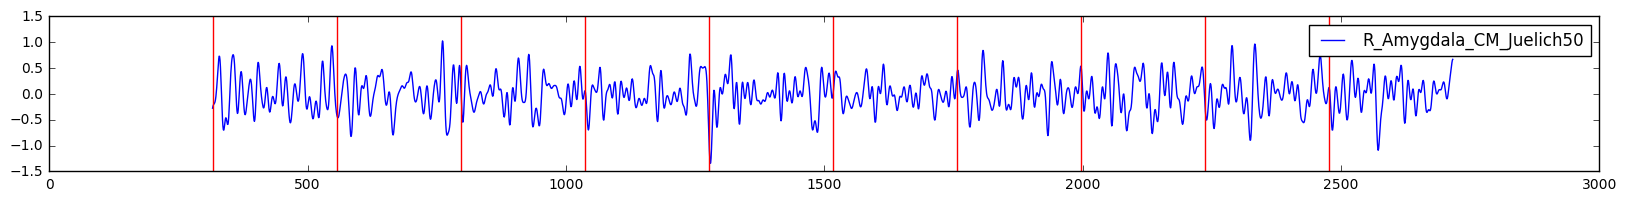

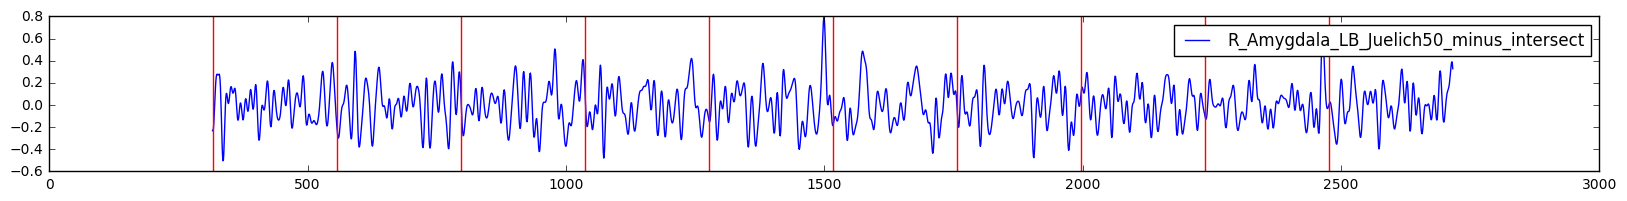

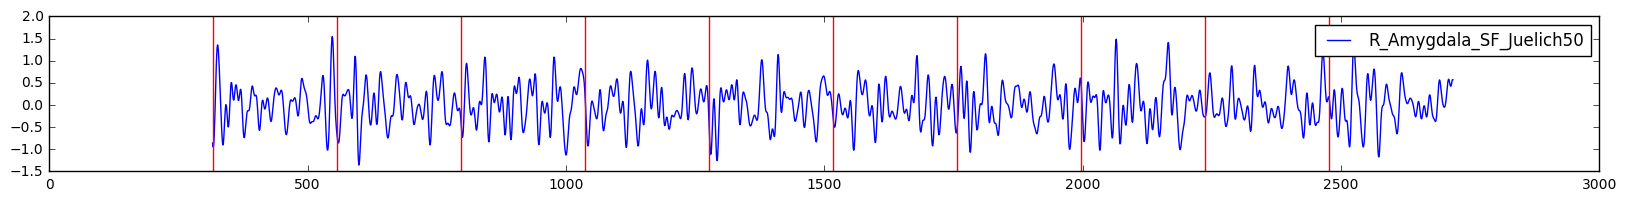

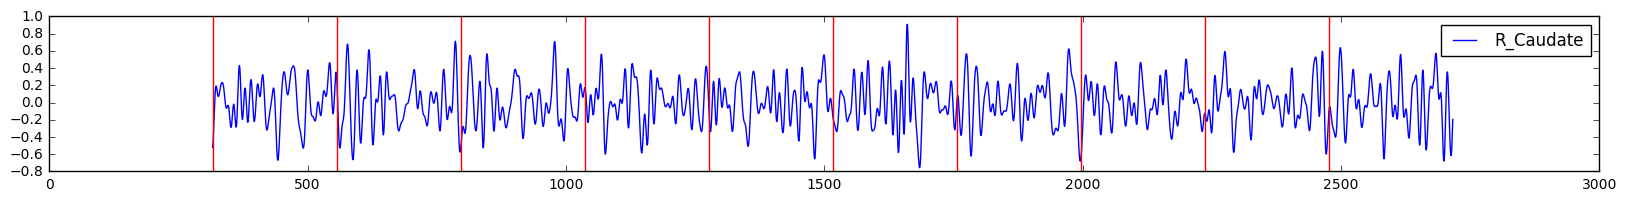

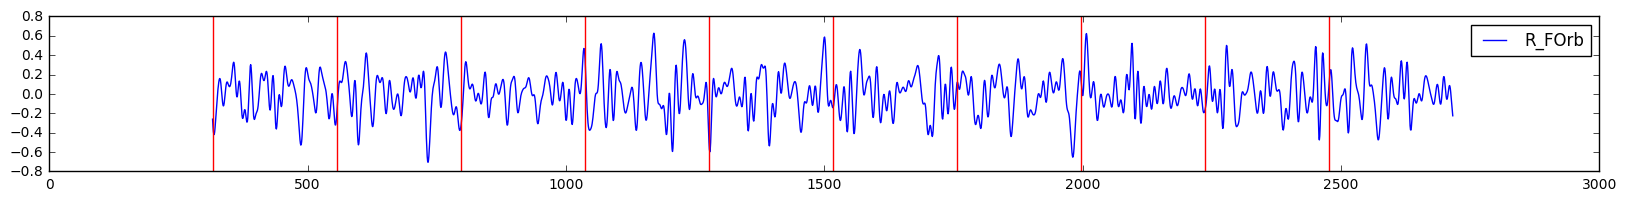

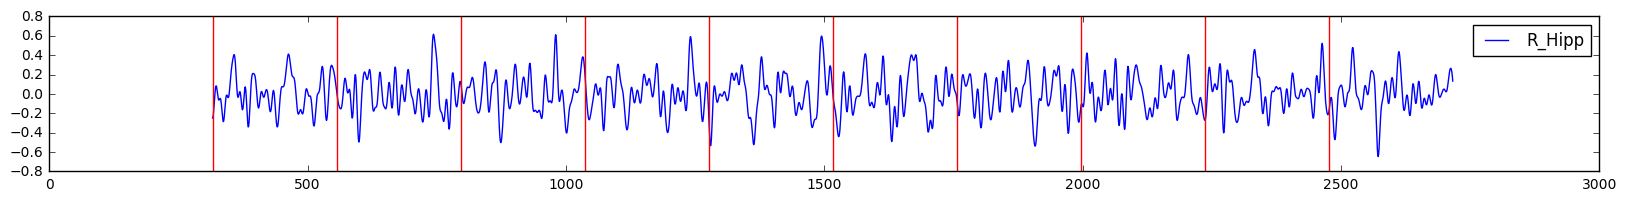

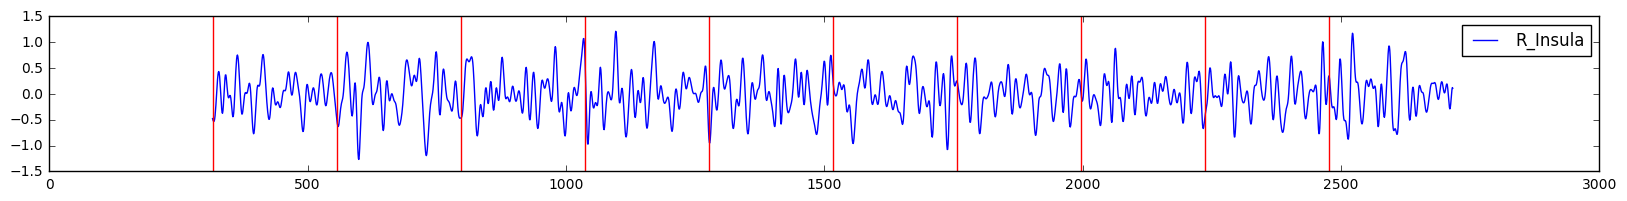

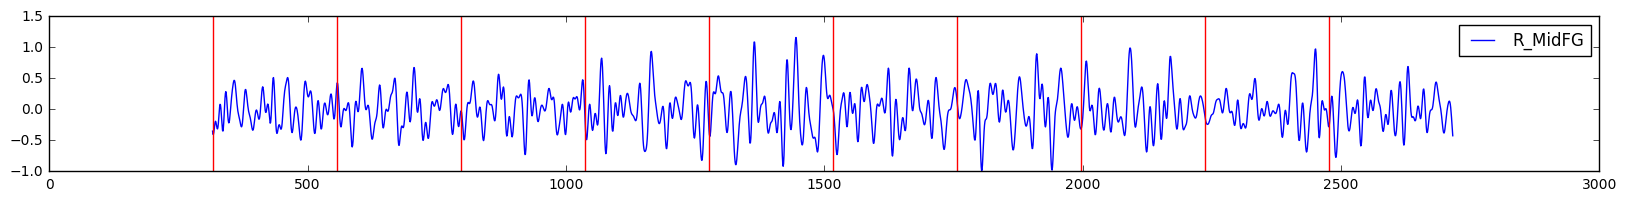

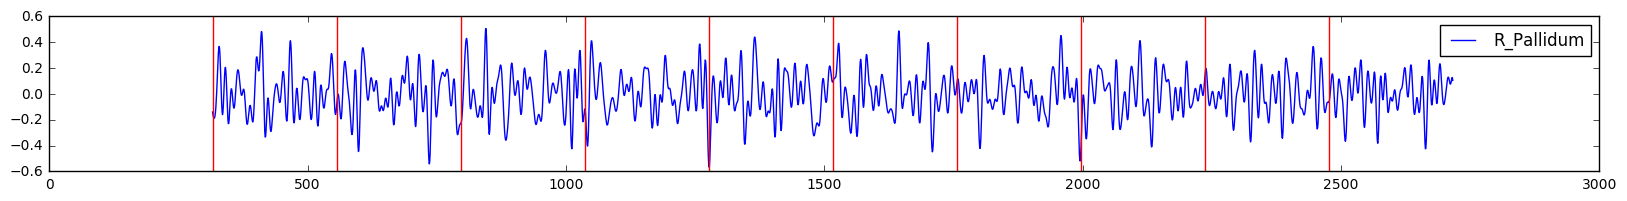

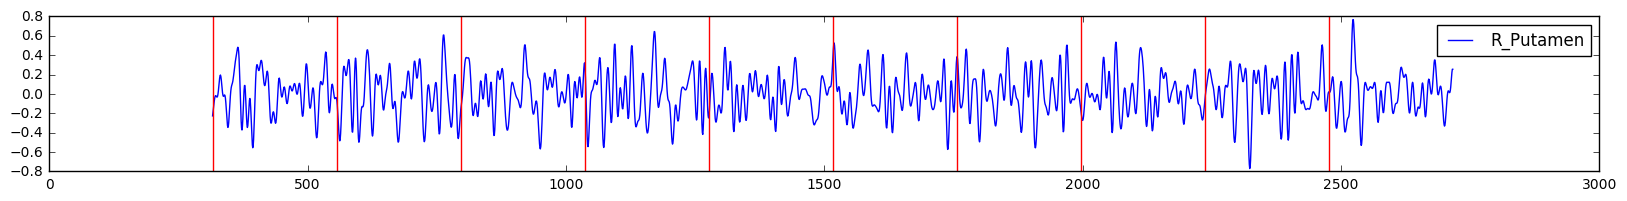

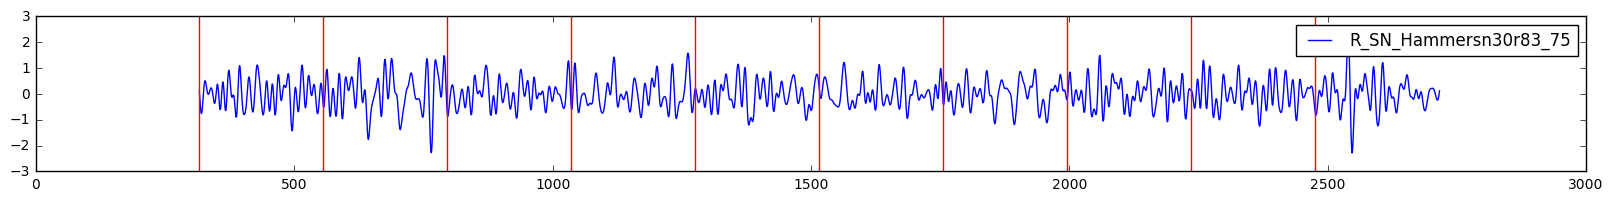

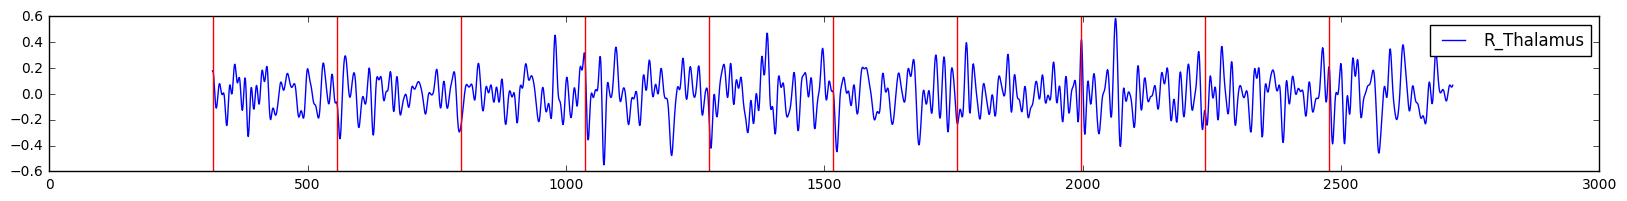

In [10]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
t = np.linspace(0,3889*.802,3890)
data_filtered = None
puffs=np.arange(316,2500,240)
print(puffs)
for trace,name in zip(data,roinames):
    trace_filtered = butter_bandpass_filter(trace,0.01,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered is None:
        data_filtered = trace_filtered
    else:
        data_filtered = np.vstack((data_filtered,trace_filtered))

In [11]:
data_filtered.shape

(29, 3890)

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


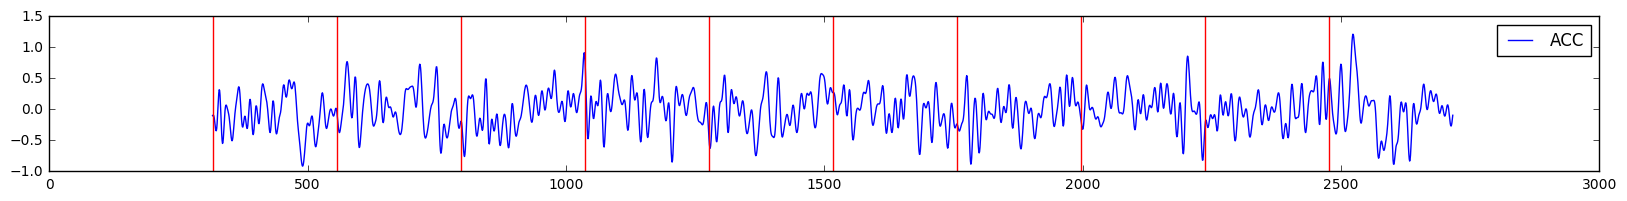

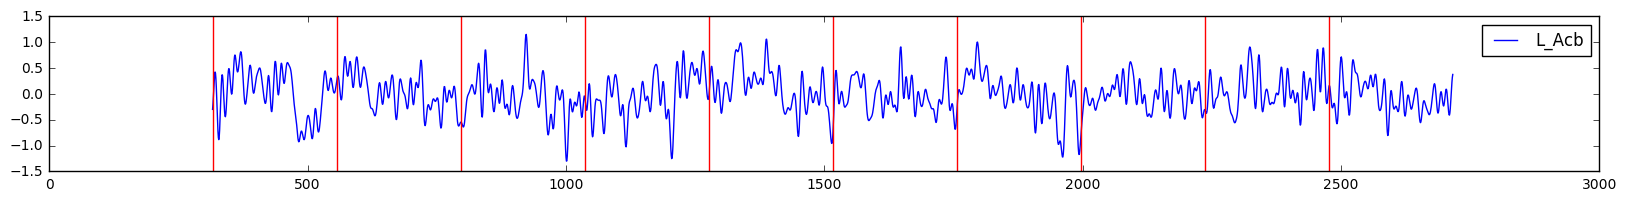

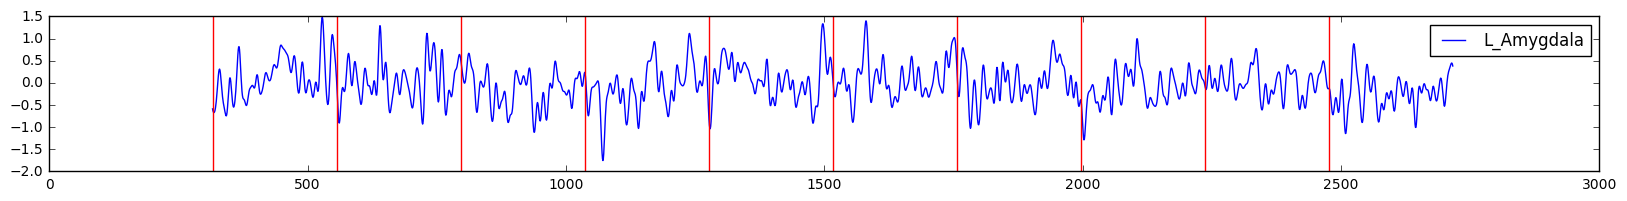

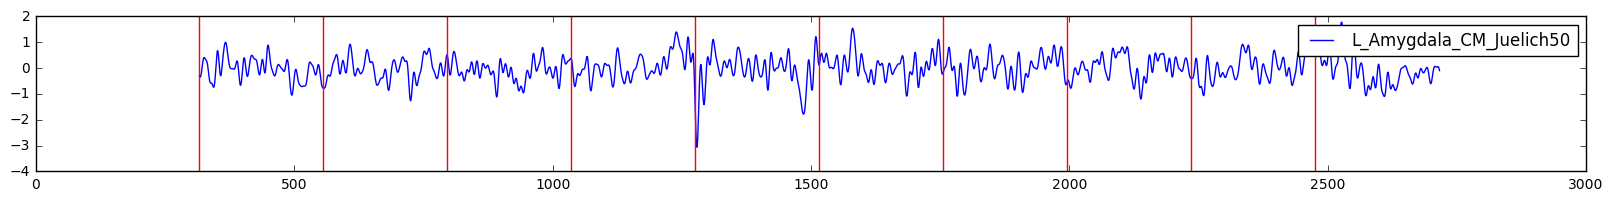

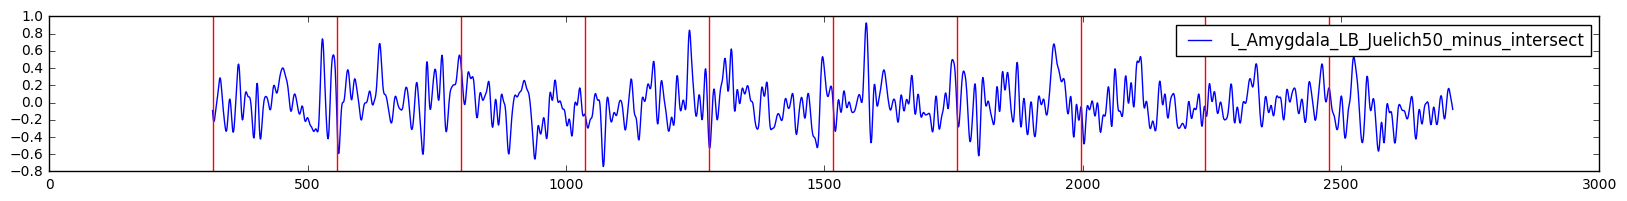

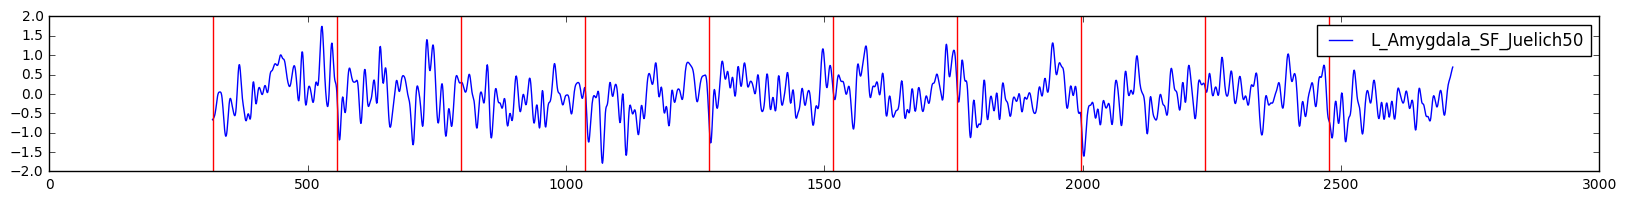

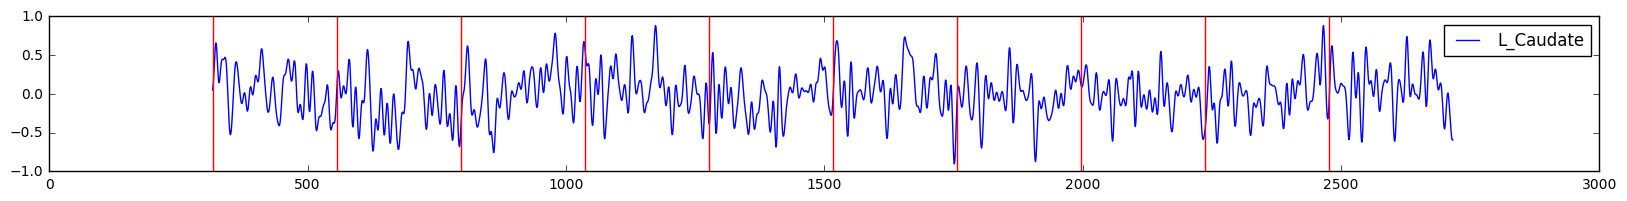

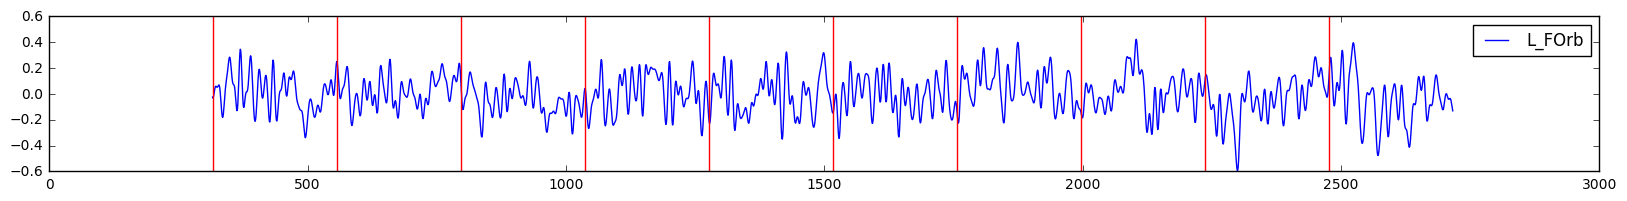

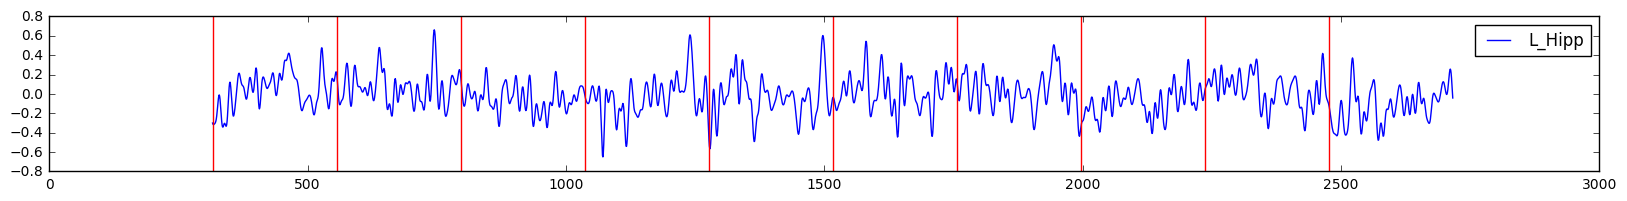

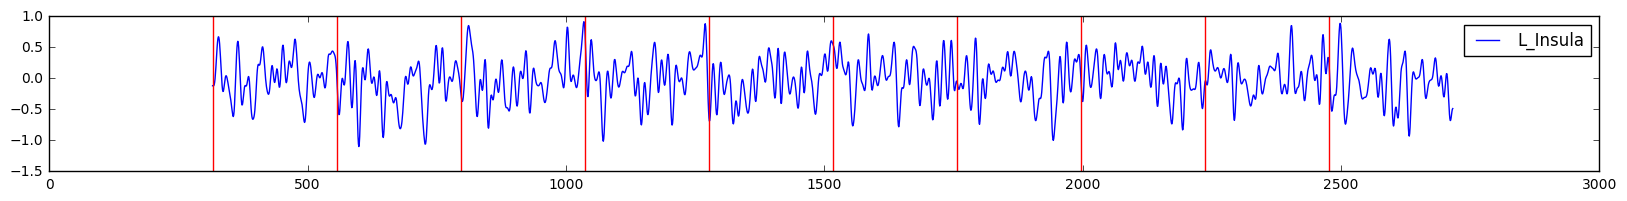

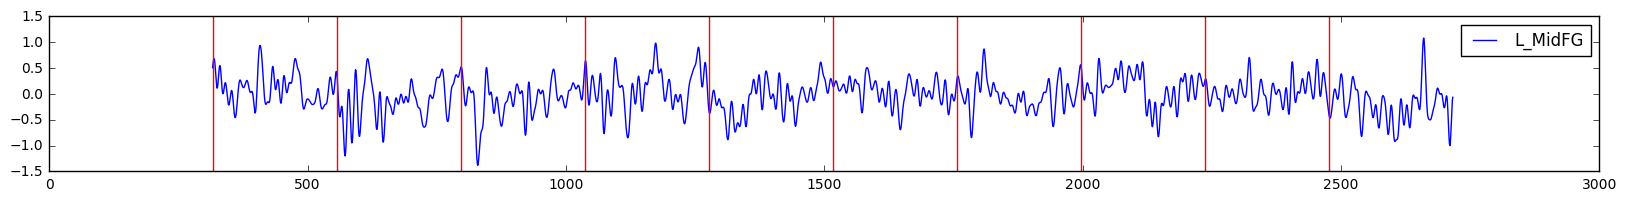

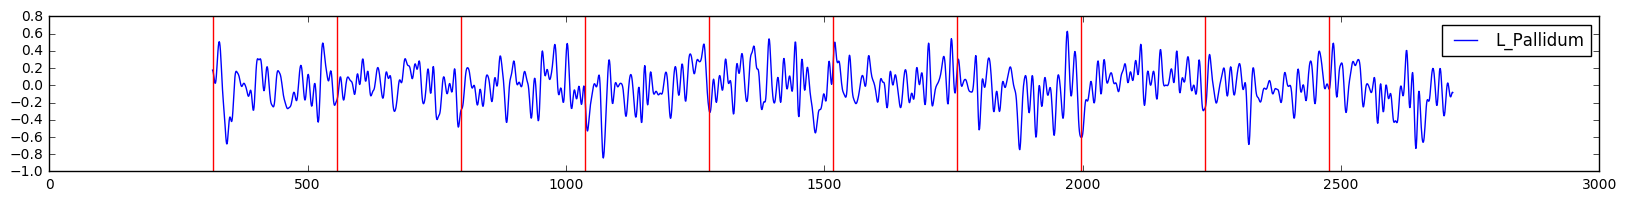

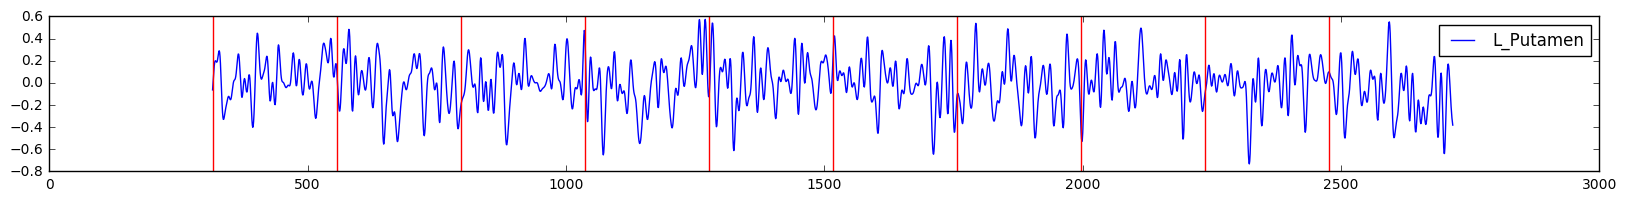

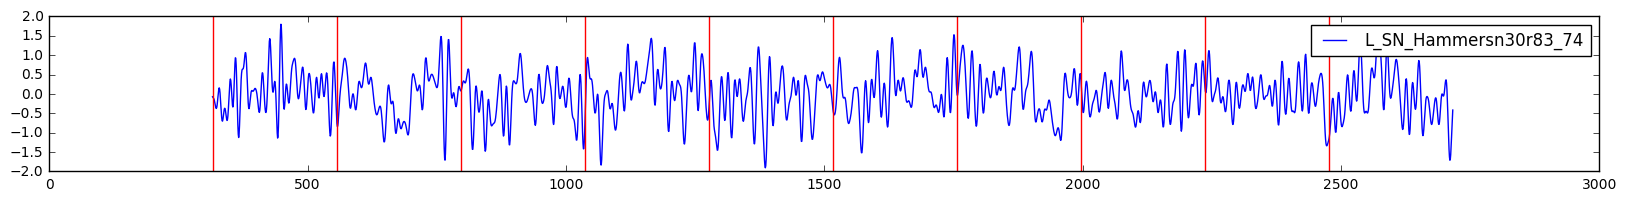

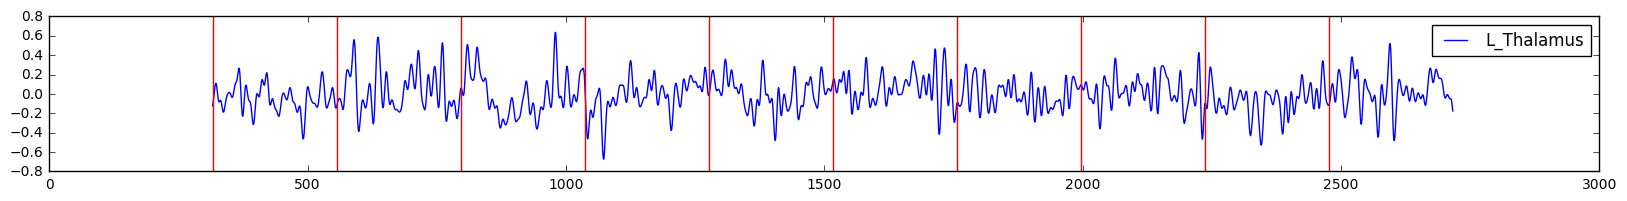

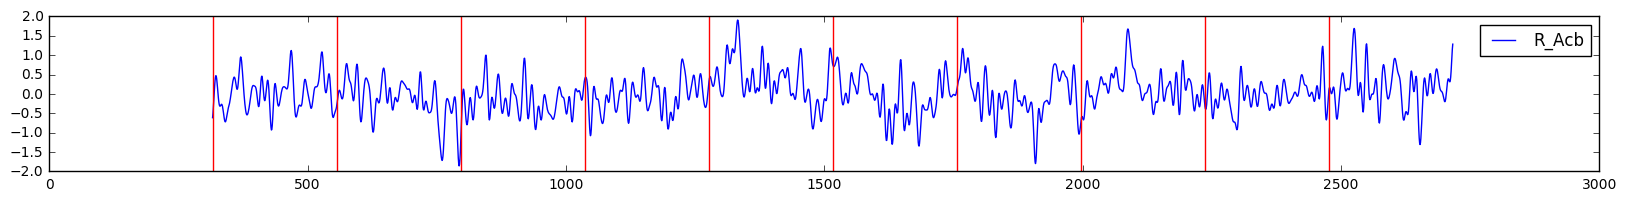

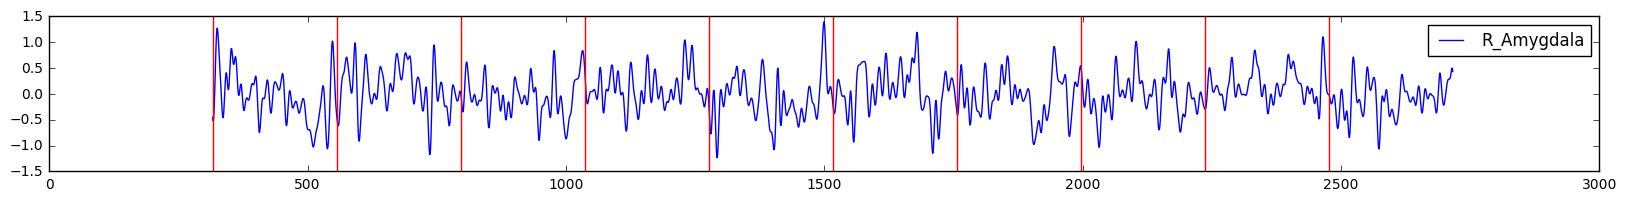

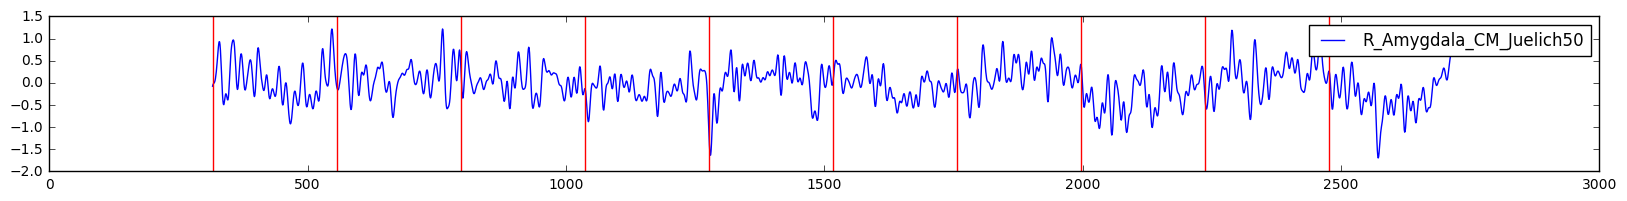

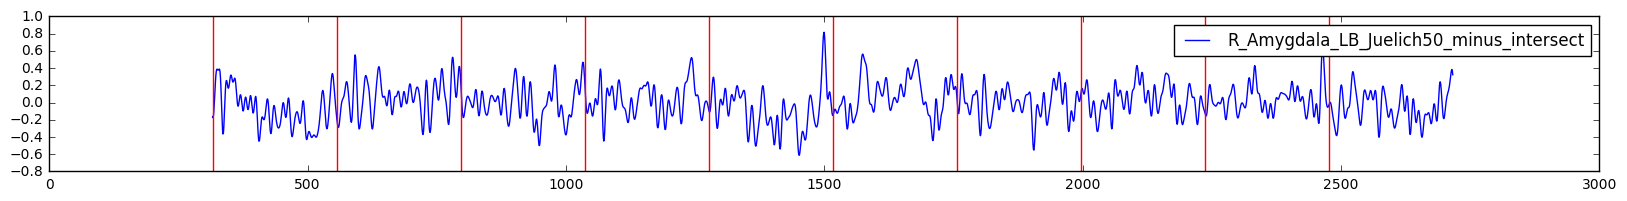

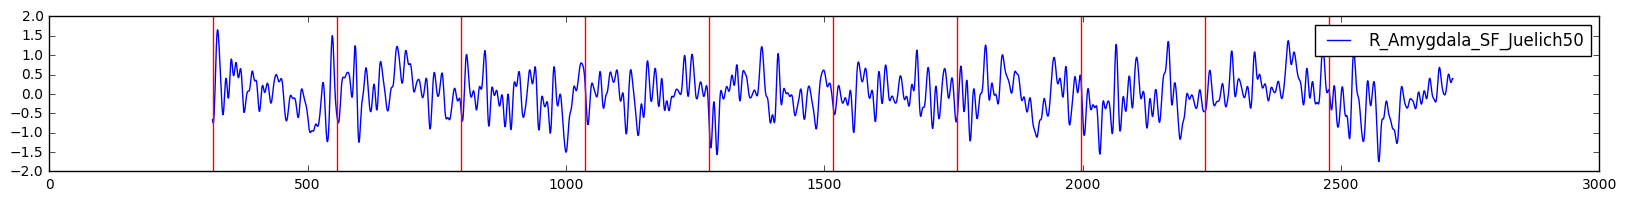

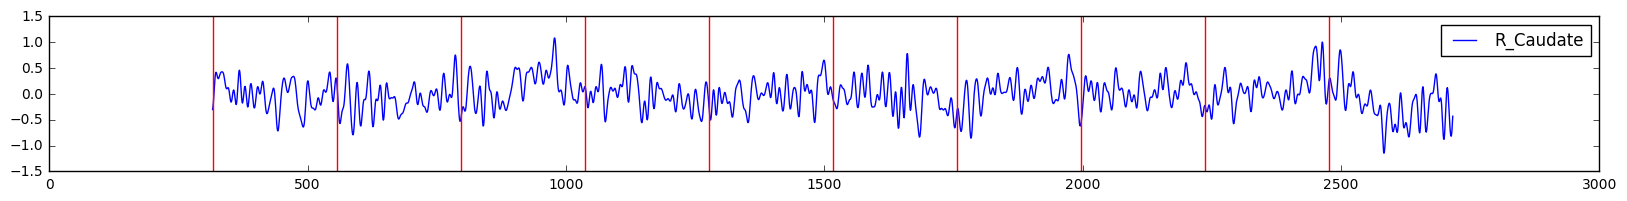

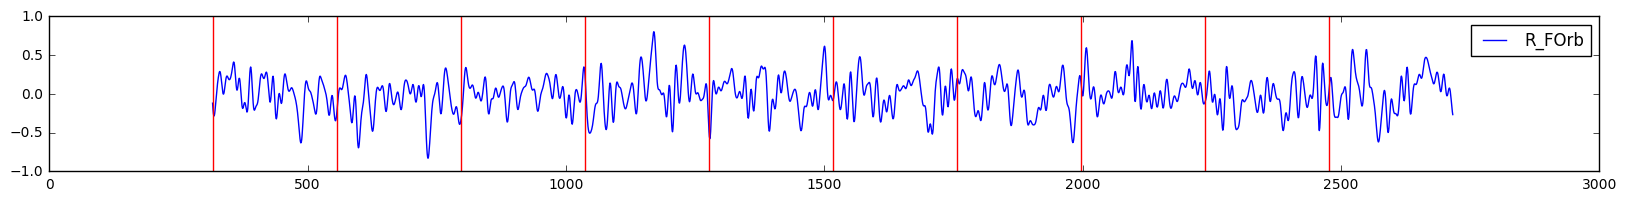

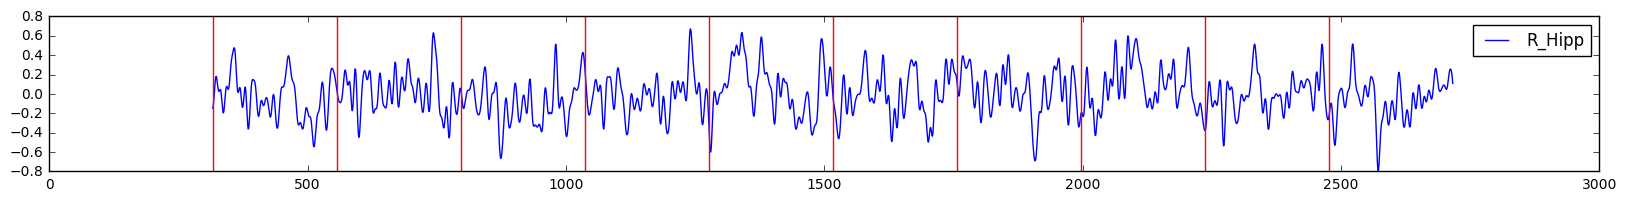

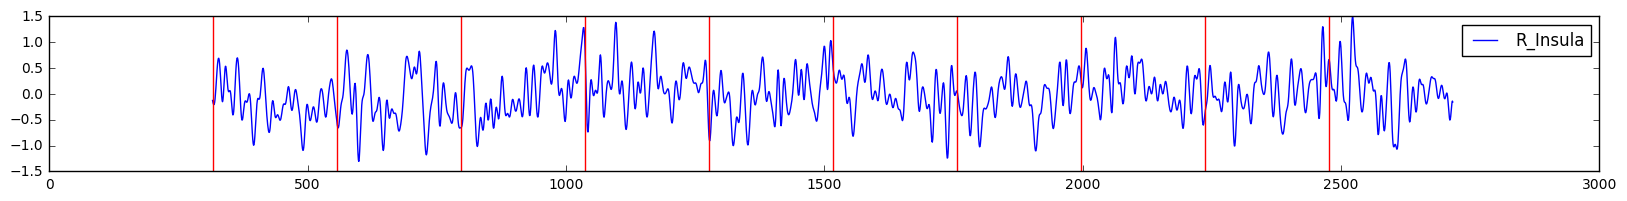

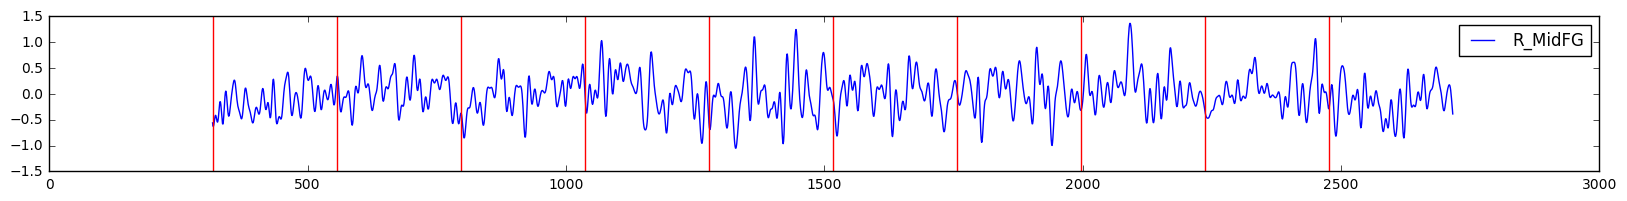

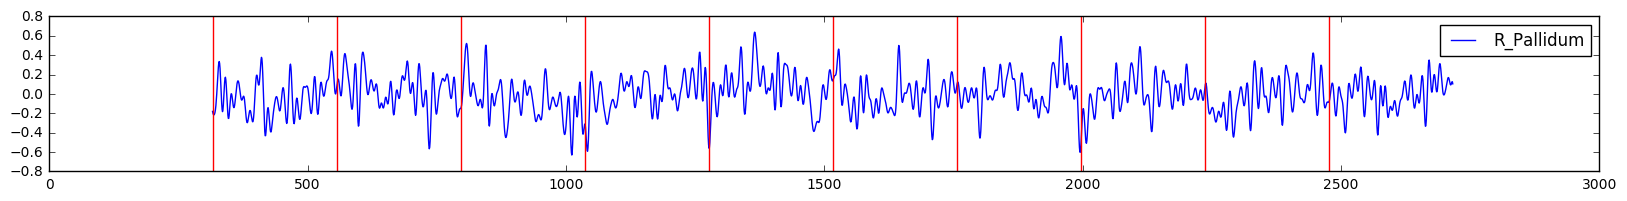

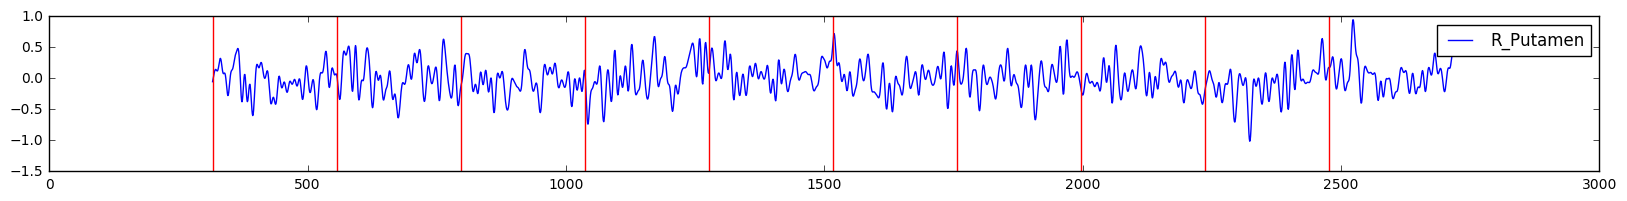

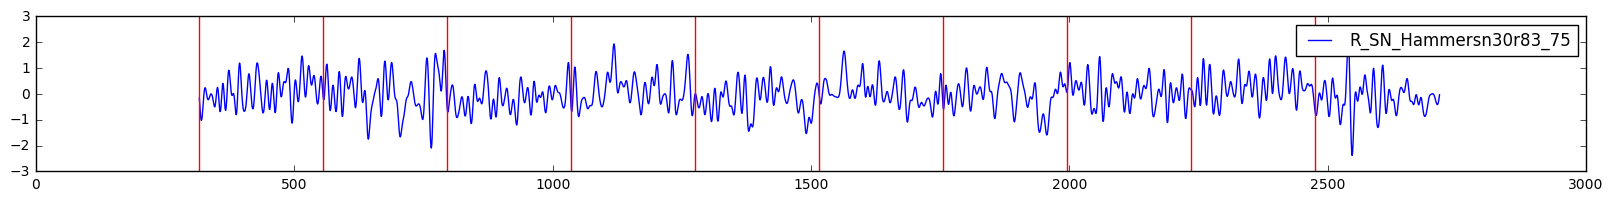

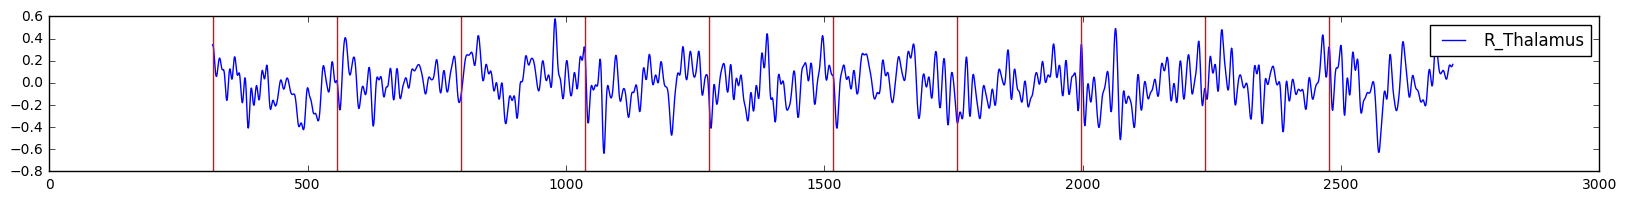

In [12]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
data_filtered_low = None
for trace,name in zip(data,roinames):
    trace_filtered_low = butter_lowpass_filter(trace,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered_low[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered_low is None:
        data_filtered_low = trace_filtered_low
    else:
        data_filtered_low = np.vstack((data_filtered_low,trace_filtered_low))

In [13]:
def pearson_combined(data):
    results = None
    for perm in itertools.combinations(range(data.shape[0]),2):
        pc=pearsonr(data[perm[0]],data[perm[1]])
        result=np.array([perm[0],perm[1],pc[0],pc[1]])
        if results is None:
            results = result
        else:
            results = np.vstack((results,result))
    return results
results_array = pearson_combined(data_filtered)

In [14]:
sorted_results=results_array[results_array[:,2].argsort()[::-1]]

In [15]:
for i,j,pr,pp in sorted_results:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.881108533565 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.873888907985 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.85023303347 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.751532889559 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.745254620601 0.0
0.0 23.0 ['ACC'] ['R_Insula'] 0.702637036364 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.679967221856 0.0
2.0 8.0 ['L_Amygdala'] ['L_Hipp'] 0.675680669529 0.0
4.0 8.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Hipp'] 0.661510649616 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.643009731114 0.0
9.0 12.0 ['L_Insula'] ['L_Putamen'] 0.638096379518 0.0
0.0 9.0 ['ACC'] ['L_Insula'] 0.630346785911 0.0
4.0 5.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Amygdala_SF_Juelich50'] 0.628297930751 0.0
11.0 12.0 ['L_Pallidum'] ['L_Putamen'] 0.621639322839 0.0
23.0 26.0 ['R_Insula'] ['R_Putamen'] 0.601350788819 0.0
0.0 28.0 ['ACC'] ['R_Tha

In [16]:
def sliding_window_pearson(data1,data2,window_size,step=1):
    pr = [pearsonr(data1[index:index+window_size],data2[index:index+window_size])[0]
          for index in range(0,min(data1.size,data2.size),step)]
    pr = np.array(pr)
    return pr

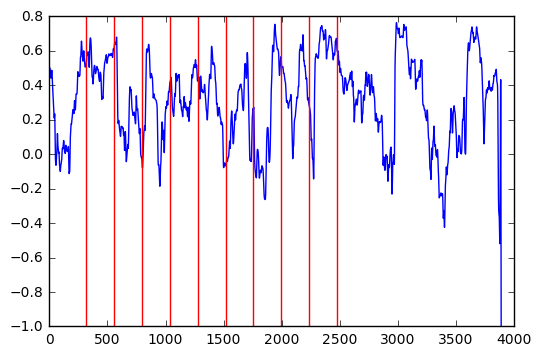

In [17]:
plt.plot(sliding_window_pearson(data_filtered[15],data_filtered[22],100))
for p in puffs:
    plt.axvline(x=p,color="r")


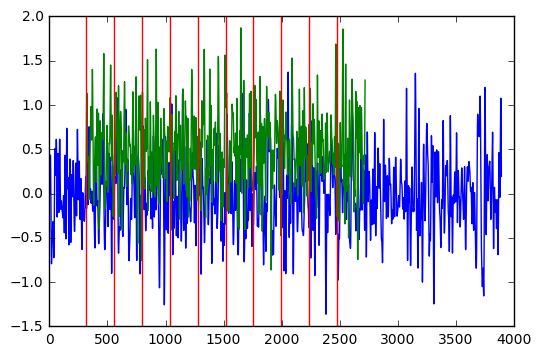

In [18]:
# new strategy:
# we compare pearson correlations of the puffs to r's from time where there is no delivery
# two time series: puffs from first puff to 2min after last puff
# nopuffs - the rest
plt.plot(range(data_filtered[15].size),data_filtered[15])
plt.plot(t[394:394+2994],data_filtered[15][394:394+2994]+0.5)
for p in puffs:
    plt.axvline(x=p,color="r")



In [19]:
data_puffs = data_filtered[:,394:394+2994]
data_nopuffs1=data_filtered[:,:394]
data_nopuffs2=data_filtered[:,394+2994:]
data_nopuffs=np.hstack((data_nopuffs1,data_nopuffs2))
print(data_puffs.shape, data_nopuffs.shape)
print(data_puffs.shape[1]+data_nopuffs.shape[1])

(29, 2994) (29, 896)
3890


In [20]:
results_puffs = pearson_combined(data_puffs)
sorted_results_puffs=results_puffs[results_puffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_puffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.886398796481 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.876032470898 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.861483231488 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.756058460751 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.748680063058 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.696745251831 0.0
2.0 8.0 ['L_Amygdala'] ['L_Hipp'] 0.687594899349 0.0
0.0 23.0 ['ACC'] ['R_Insula'] 0.682418526284 0.0
4.0 8.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Hipp'] 0.657810275191 0.0
4.0 5.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Amygdala_SF_Juelich50'] 0.647712842463 0.0
0.0 9.0 ['ACC'] ['L_Insula'] 0.638125312524 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.637515679846 0.0
9.0 12.0 ['L_Insula'] ['L_Putamen'] 0.62981300807 0.0
11.0 12.0 ['L_Pallidum'] ['L_Putamen'] 0.613420687483 4.73505962164e-309
23.0 26.0 ['R_Insula'] ['R_Putamen'] 0.600276572387 1.24014103391

In [21]:
results_nopuffs = pearson_combined(data_nopuffs)
sorted_results_nopuffs=results_nopuffs[results_nopuffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_nopuffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.8666330477 3.53233875665e-272
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.863661720686 3.29525213208e-268
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.8138668335 5.28672537127e-213
0.0 23.0 ['ACC'] ['R_Insula'] 0.773354068028 3.88632366226e-179
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.736023138024 1.20254741323e-153
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.734307373101 1.4023289977e-152
4.0 8.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Hipp'] 0.674606263214 5.4002091386e-120
9.0 12.0 ['L_Insula'] ['L_Putamen'] 0.669668768409 1.21881538772e-117
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.659067861645 9.737251194e-113
11.0 12.0 ['L_Pallidum'] ['L_Putamen'] 0.649747593293 1.3700379789e-108
2.0 8.0 ['L_Amygdala'] ['L_Hipp'] 0.648268735886 6.04726454373e-108
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.624916454568 3.20826026927e-98
0.0 14.0 ['ACC'] ['L_Thalamus'] 0.6175874711 2.457074252

In [22]:
print(results_puffs.shape)

(406, 4)


In [23]:
results_diffp = results_puffs[:,2]-results_nopuffs[:,2]
results_diff = np.vstack((results_puffs.T,results_diffp)).T
print(results_diff.shape)

(406, 5)


In [24]:
sorted_results_diff=results_diff[results_diff[:,4].argsort()[::-1]]
for i,j,pr,pp,pd in sorted_results_diff:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp,pd)

0.0 7.0 ['ACC'] ['L_FOrb'] 0.376577396457 1.68900342977e-101 0.306050726445
3.0 26.0 ['L_Amygdala_CM_Juelich50'] ['R_Putamen'] 0.376736168979 1.37054394187e-101 0.268867303473
18.0 28.0 ['R_Amygdala_LB_Juelich50_minus_intersect'] ['R_Thalamus'] 0.352893580924 1.60444249388e-88 0.24581843574
7.0 26.0 ['L_FOrb'] ['R_Putamen'] 0.176255342511 2.56756585719e-22 0.232589625848
5.0 26.0 ['L_Amygdala_SF_Juelich50'] ['R_Putamen'] 0.223507333205 3.28732179087e-35 0.228385086854
14.0 20.0 ['L_Thalamus'] ['R_Caudate'] 0.267459411726 3.25364128898e-50 0.226802640957
20.0 22.0 ['R_Caudate'] ['R_Hipp'] 0.194489264912 6.58830984164e-27 0.214678770174
3.0 7.0 ['L_Amygdala_CM_Juelich50'] ['L_FOrb'] 0.243707069557 9.84850441691e-42 0.214475285605
1.0 18.0 ['L_Acb'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.137426621812 4.27463692294e-14 0.214421380878
0.0 20.0 ['ACC'] ['R_Caudate'] 0.505438979871 6.26413367161e-194 0.204028759733
1.0 14.0 ['L_Acb'] ['L_Thalamus'] 0.184555524649 2.39167424515e-24 0.20

In [25]:
# now we want to look at the unfiltered data and look at the powerspectrum
data_puffs_nofilter = data[:,394:394+2994]

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


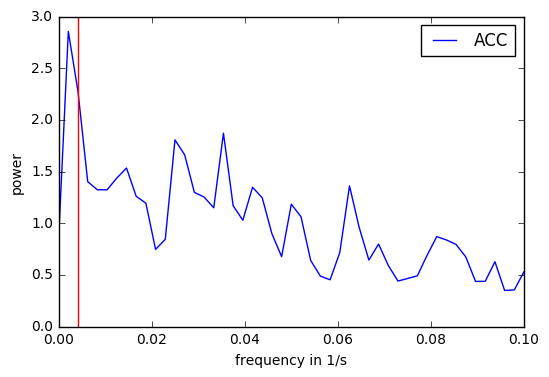

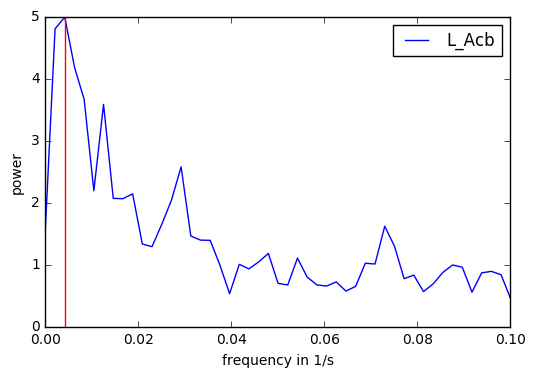

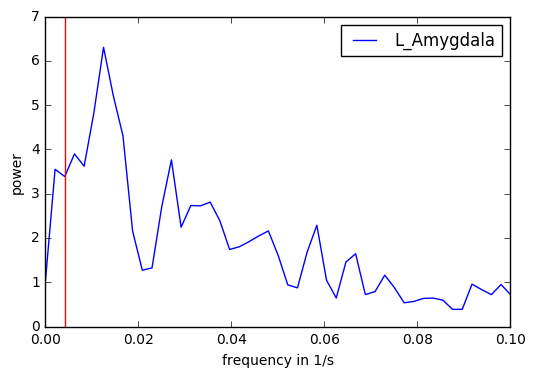

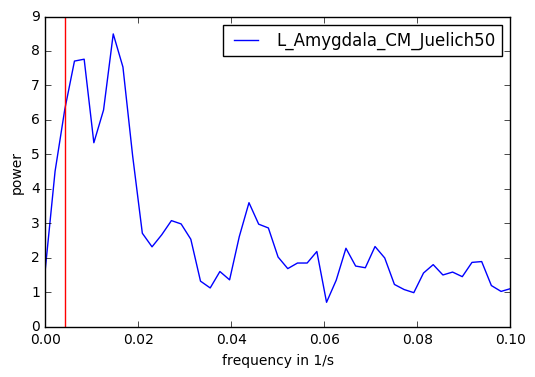

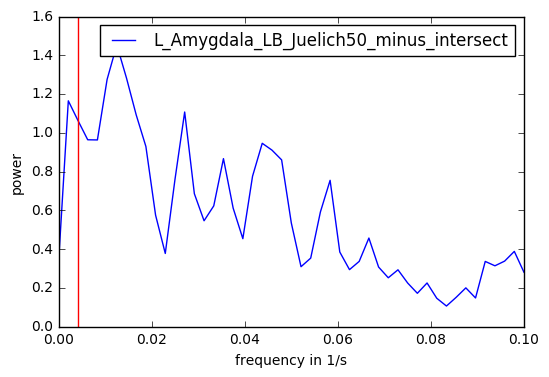

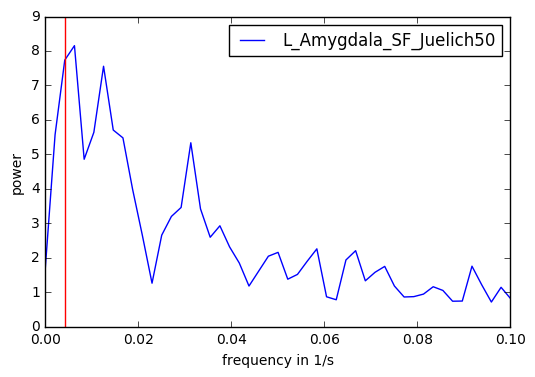

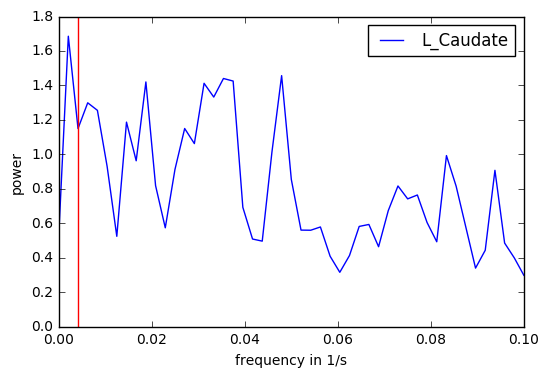

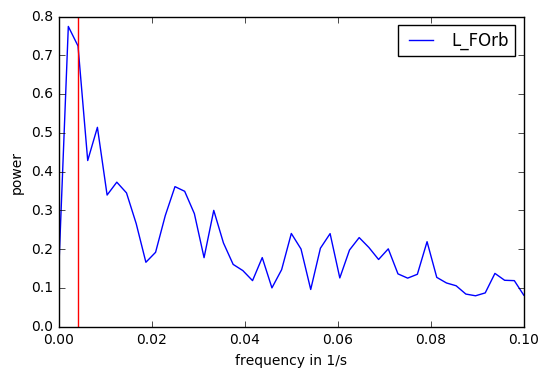

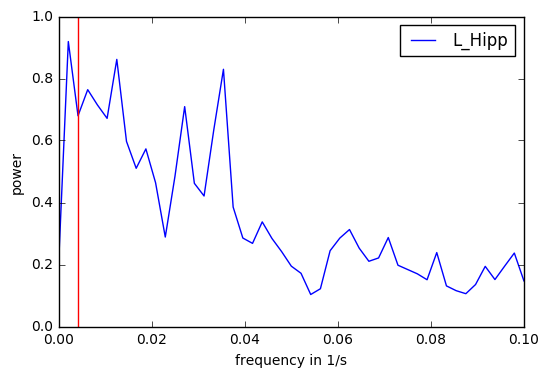

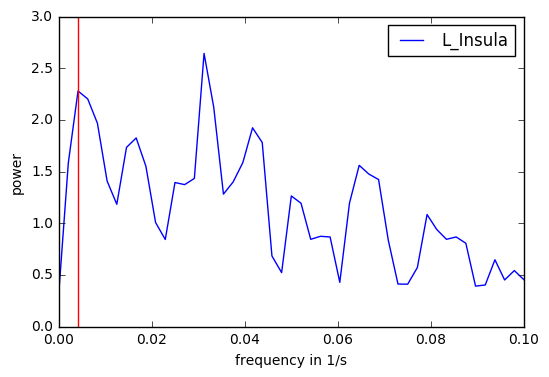

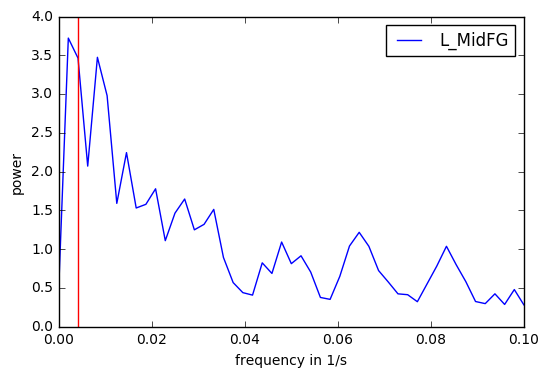

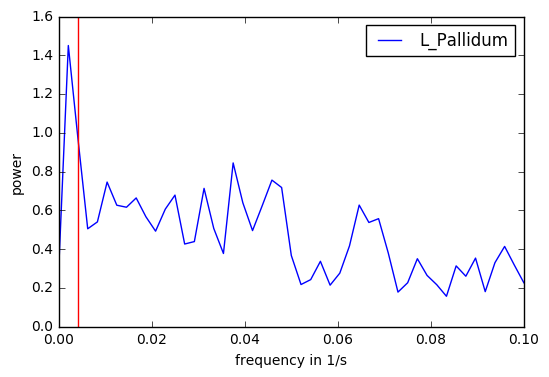

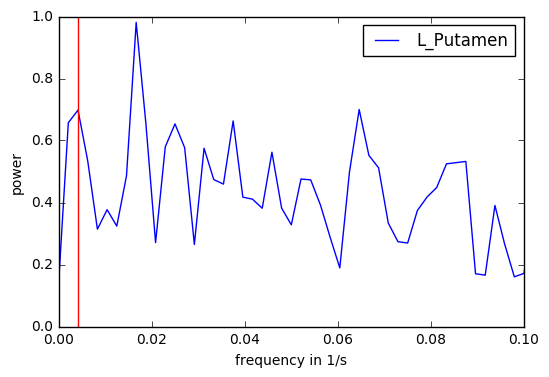

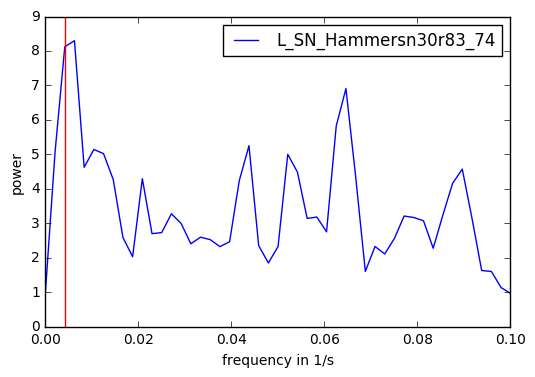

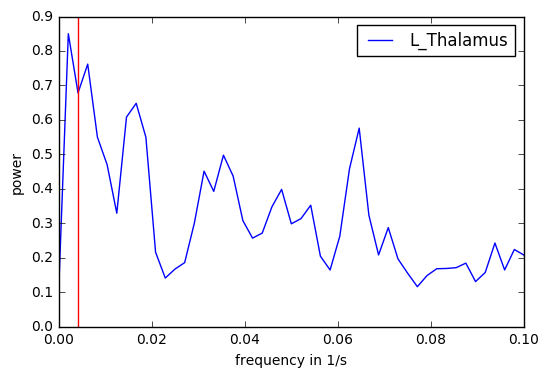

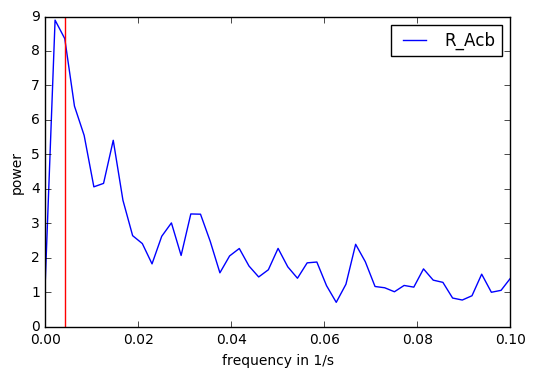

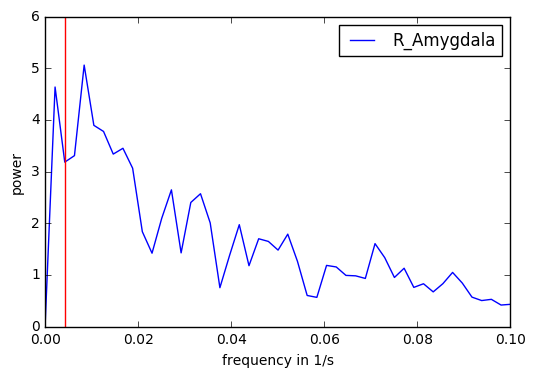

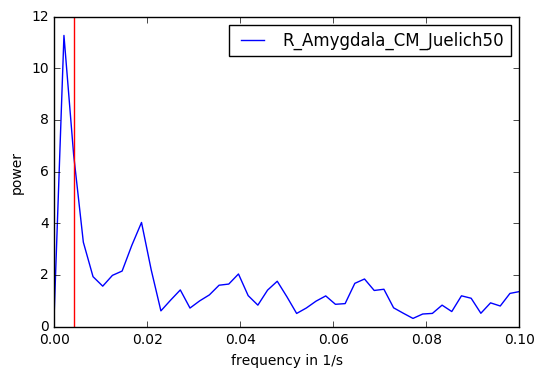

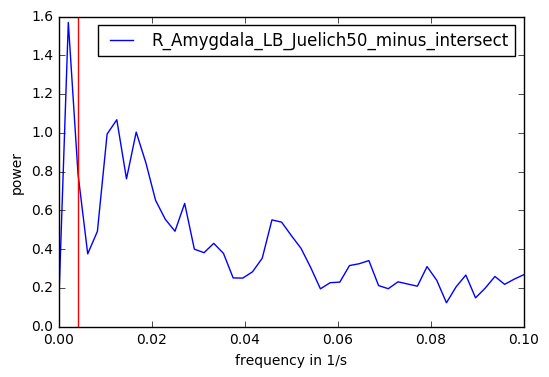

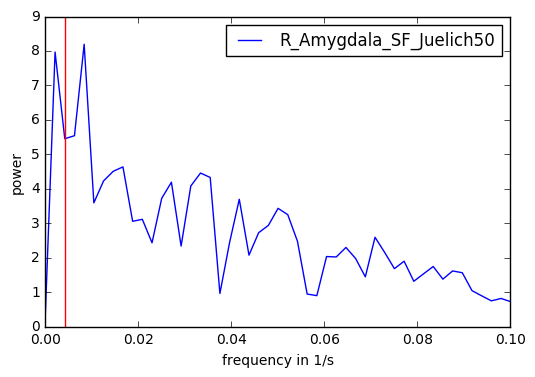

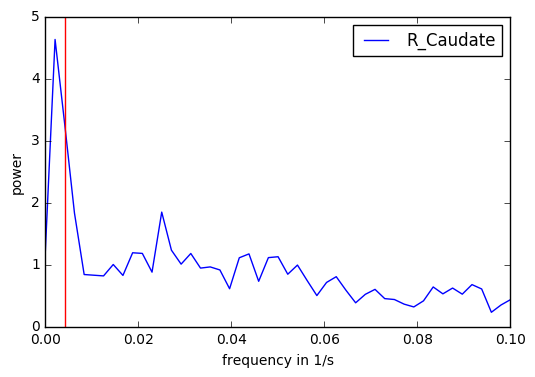

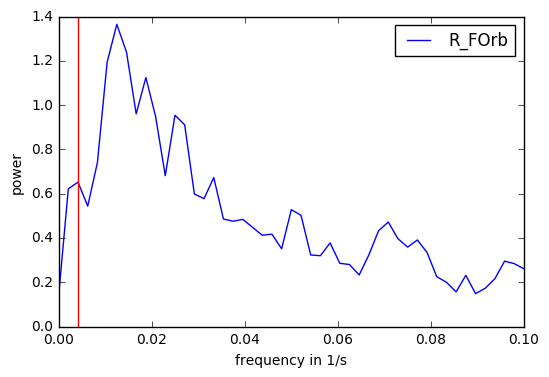

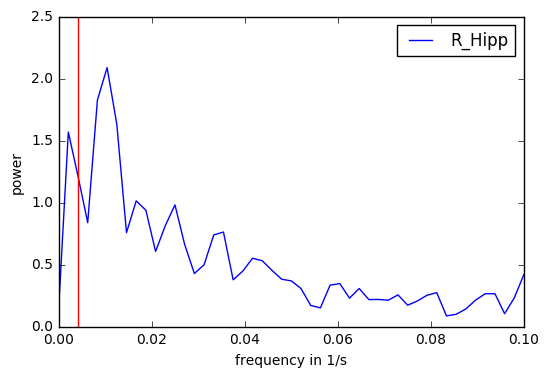

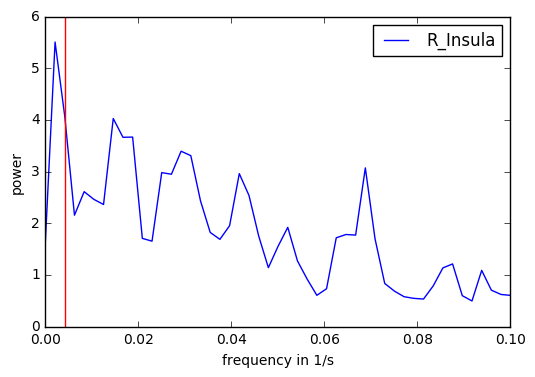

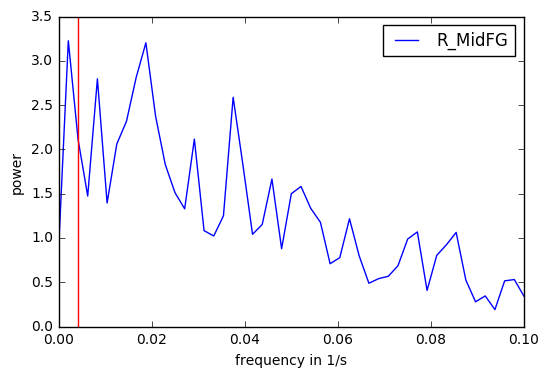

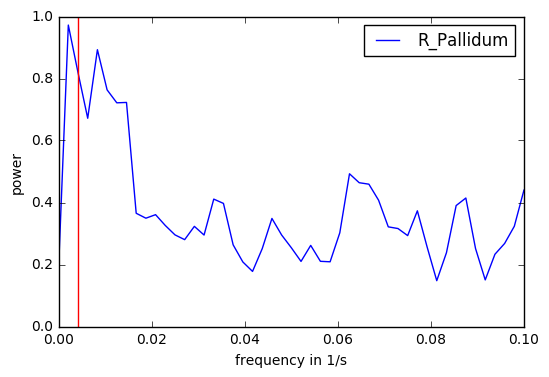

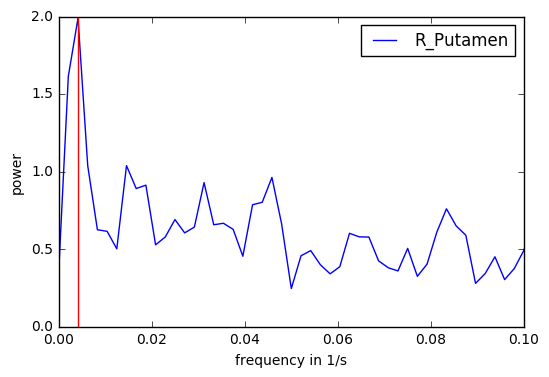

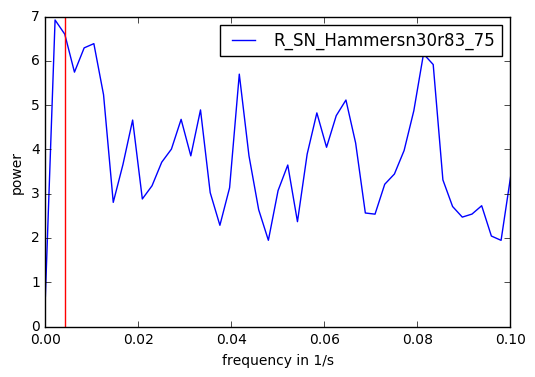

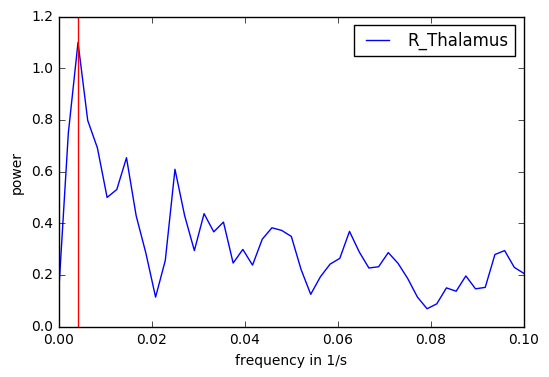

In [26]:
powerspectra = None
for region,roiname in zip(data_puffs_nofilter,roinames):
    f,ps = welch(region,fs=1/0.802,nperseg=598)
    plt.figure()
    plt.plot(f,ps,label=roiname[0])
    plt.xlim((0,0.1))
    plt.xlabel("frequency in 1/s")
    plt.ylabel("power")
    plt.axvline(x=1/240.0,color="r")
    plt.legend()
    if powerspectra is None:
        powerspectra  = ps
    else:
        powerspectra = np.vstack((powerspectra,ps))


In [27]:
print(f)

[ 0.          0.00208509  0.00417018  0.00625526  0.00834035  0.01042544
  0.01251053  0.01459562  0.01668071  0.01876579  0.02085088  0.02293597
  0.02502106  0.02710615  0.02919124  0.03127632  0.03336141  0.0354465
  0.03753159  0.03961668  0.04170177  0.04378685  0.04587194  0.04795703
  0.05004212  0.05212721  0.0542123   0.05629738  0.05838247  0.06046756
  0.06255265  0.06463774  0.06672283  0.06880791  0.070893    0.07297809
  0.07506318  0.07714827  0.07923335  0.08131844  0.08340353  0.08548862
  0.08757371  0.0896588   0.09174388  0.09382897  0.09591406  0.09799915
  0.10008424  0.10216933  0.10425441  0.1063395   0.10842459  0.11050968
  0.11259477  0.11467986  0.11676494  0.11885003  0.12093512  0.12302021
  0.1251053   0.12719039  0.12927547  0.13136056  0.13344565  0.13553074
  0.13761583  0.13970091  0.141786    0.14387109  0.14595618  0.14804127
  0.15012636  0.15221144  0.15429653  0.15638162  0.15846671  0.1605518
  0.16263689  0.16472197  0.16680706  0.16889215  0.1

In [28]:
totalpower=np.mean(powerspectra,axis=1)
print(totalpower.shape)
print(powerspectra.shape)
scaled_PS = np.divide(powerspectra.T,totalpower).T
print(scaled_PS.shape)

sorted_PS =scaled_PS[scaled_PS[:,2].argsort()[::-1]]
sorted_roinames = roinames[scaled_PS[:,2].argsort()[::-1]]
print(sorted_PS.shape)

(29,)
(29, 300)
(29, 300)
(29, 300)


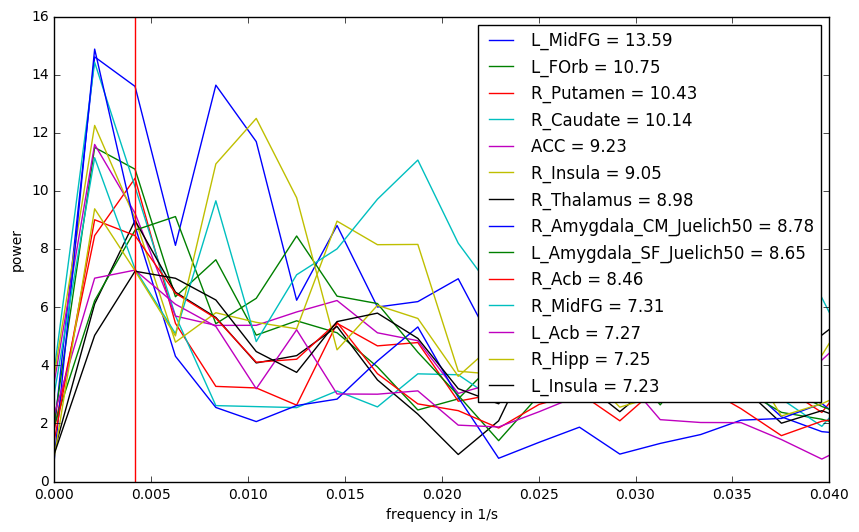

In [29]:
plt.figure(figsize=(10,6))
for spectra,roiname in zip(sorted_PS,sorted_roinames):
    if spectra[2] > 7:
        rel_strength = '{:2.2f}'.format(spectra[2])
        plt.plot(f,spectra,label=roiname[0]+" = "+rel_strength)
        plt.xlim((0,0.04))
    
plt.xlabel("frequency in 1/s")
plt.ylabel("power")
plt.axvline(x=1/240.0,color="r")
plt.legend()



In [30]:
for puff,pufftotal,roiname in zip(powerspectra.T[2],totalpower,roinames):
    print(puff,puff/pufftotal,roiname[0])

2.27294400745 9.23054696049 ACC
4.99141306012 7.27390646057 L_Acb
3.38626759871 6.26997074385 L_Amygdala
6.29978892989 5.53907633648 L_Amygdala_CM_Juelich50
1.06269862125 4.91982515303 L_Amygdala_LB_Juelich50_minus_intersect
7.73412022832 8.647294783 L_Amygdala_SF_Juelich50
1.14932889096 3.94736897956 L_Caudate
0.723894800469 10.7455970744 L_FOrb
0.679808321472 6.00491820837 L_Hipp
2.27869123465 7.23452950444 L_Insula
3.46266864276 13.5948032324 L_MidFG
0.966842910638 4.08680684214 L_Pallidum
0.698108468782 4.525238725 L_Putamen
8.11927551579 4.56387561041 L_SN_Hammersn30r83_74
0.678174359477 5.03547905737 L_Thalamus
8.35692705131 8.46139368193 R_Acb
3.18130137223 5.43187954535 R_Amygdala
6.65050200411 8.78216110277 R_Amygdala_CM_Juelich50
0.787400646213 4.30814647951 R_Amygdala_LB_Juelich50_minus_intersect
5.45222565688 5.4316718713 R_Amygdala_SF_Juelich50
3.25504661058 10.1401487297 R_Caudate
0.651983261206 4.60966943193 R_FOrb
1.21148288965 7.24878776267 R_Hipp
4.06705938181 9.04980

In [31]:
for puff,roiname in zip(sorted_PS.T[2],sorted_roinames):
    print(puff,roiname[0])

13.5948032324 L_MidFG
10.7455970744 L_FOrb
10.4324836979 R_Putamen
10.1401487297 R_Caudate
9.23054696049 ACC
9.04980055348 R_Insula
8.97885320728 R_Thalamus
8.78216110277 R_Amygdala_CM_Juelich50
8.647294783 L_Amygdala_SF_Juelich50
8.46139368193 R_Acb
7.30975665999 R_MidFG
7.27390646057 L_Acb
7.24878776267 R_Hipp
7.23452950444 L_Insula
6.26997074385 L_Amygdala
6.00491820837 L_Hipp
5.53907633648 L_Amygdala_CM_Juelich50
5.43187954535 R_Amygdala
5.4316718713 R_Amygdala_SF_Juelich50
5.03547905737 L_Thalamus
4.91982515303 L_Amygdala_LB_Juelich50_minus_intersect
4.60966943193 R_FOrb
4.56387561041 L_SN_Hammersn30r83_74
4.525238725 L_Putamen
4.30814647951 R_Amygdala_LB_Juelich50_minus_intersect
4.08680684214 L_Pallidum
3.94736897956 L_Caudate
3.74838124203 R_Pallidum
3.40662581122 R_SN_Hammersn30r83_75
